## Problem Statement: 
**Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.**

## Importing the Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
# sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

## Exploring the Data

In [2]:
# Importing the dataset
df = pd.read_csv("bank.csv")

In [3]:
# Shape
df.shape

(891, 12)

In [4]:
# Previewing the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Datatypes of every columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# Columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### Categorical Columns

- Survived
- PClass
- Sex
- SibSp
- Parch
- Embarked

### Numerical Columns

- Age 
- Fare
- PassengerId

### Mixed Columns

- Name
- Ticket
- Cabin

In [10]:
# check duplicate values
df.duplicated().sum()

0

In [11]:
# Check null values 
pd.DataFrame({'count': df.shape[0], 
              'nulls': df.isnull().sum(), 
              'nulls%': df.isnull().mean() * 100, 
              'cardinality': df.nunique(),
              "Datatypes" : df.dtypes
             })

,count,nulls,nulls%,cardinality,Datatypes
PassengerId,891,0,0.000000,891,int64
Survived,891,0,0.000000,2,int64
Pclass,891,0,0.000000,3,int64
Name,891,0,0.000000,891,object
Sex,891,0,0.000000,2,object
Age,891,177,19.865320,88,float64
SibSp,891,0,0.000000,7,int64
Parch,891,0,0.000000,7,int64
Ticket,891,0,0.000000,681,object
Fare,891,0,0.000000,248,float64


#### Observations
- Age has 177 missing values (19.86%)
- Cabin has 687 missing values (77.10%), will have to drop 
- Embarked has 2 missing values (0.22%)
- Few columns have inappropriate data types

In [12]:
# Dropping cabin column
df.drop(columns=['Cabin'],inplace=True)

In [13]:
# Imputing missing values for age
# Strategy - mean
df["Age"] = df['Age'].fillna(df['Age'].mean())

In [14]:
# Imputing missing values for embarked column
print(f"most frequent value in Embarked : {df['Embarked'].mode()[0]}")
# print("-"*50)
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

most frequent value in Embarked : S


In [15]:
df.isnull().sum().sum()

0

There is no null values

In [16]:
# Change the SibSp and Parch to categories

print(df['SibSp'].value_counts())
print("-"*50)
print("-"*50)
print(df['Parch'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
--------------------------------------------------
--------------------------------------------------
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


### Changing data type for the following cols

- Survived(category)
- PClass(category)
- Sex(category)
- Age(int)
- Embarked(category)

In [17]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [18]:
df.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age               int32
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object

### Univariate Analysis

0    549
1    342
Name: Survived, dtype: int64
--------------------------------------------------
Percentage of people died : 61.61616161616161


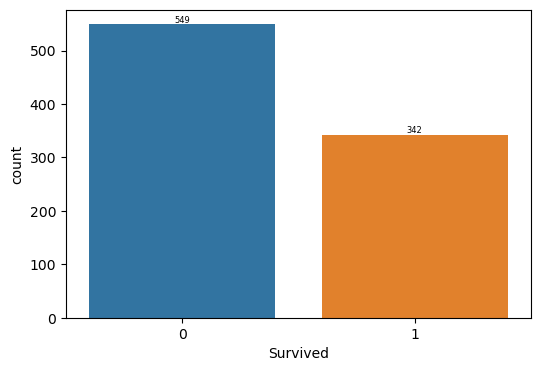

In [19]:
# Survived column

print(df['Survived'].value_counts())
print("-"*50)
print(f"Percentage of people died : {(df['Survived'].value_counts().values[0]/891)*100}")
plt.figure(figsize = (6,4))
a= sns.countplot(x = df['Survived'] )
a.bar_label(a.containers[0], fontsize=6);

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64
--------------------------------------------------


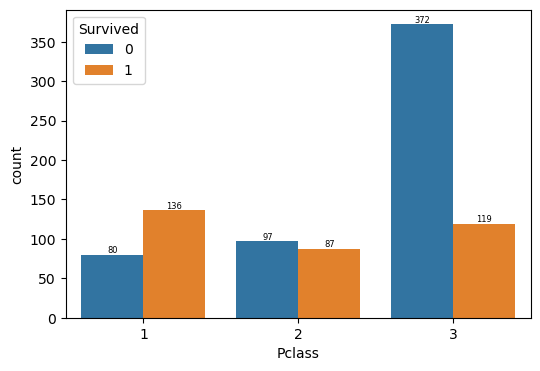

In [20]:
# Pclass column

print((df['Pclass'].value_counts()/891)*100)
print("-"*50)
plt.figure(figsize = (6,4))
a= sns.countplot(x = df['Pclass'] , hue = df['Survived'])
a.bar_label(a.containers[0], fontsize=6)
a.bar_label(a.containers[1], fontsize=6);

#### Conclusion 
- Pclass 3 was the most crowded class 
- Most people died was from 3 class 

male      64.758698
female    35.241302
Name: Sex, dtype: float64
--------------------------------------------------


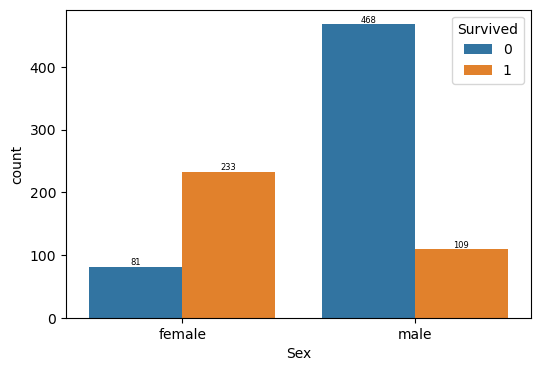

In [21]:
# Sex column

print((df['Sex'].value_counts()/891)*100)
print("-"*50)
plt.figure(figsize = (6,4))
a= sns.countplot(x = df['Sex'] , hue = df['Survived'])
a.bar_label(a.containers[0], fontsize=6)
a.bar_label(a.containers[1], fontsize=6);

#### Conclusion
- Number of men died is greater than women

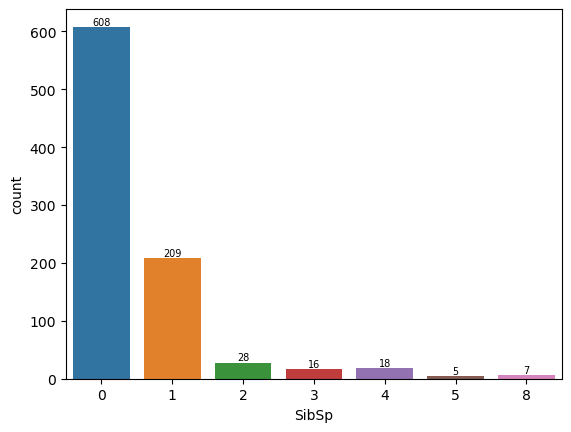

In [22]:
# SibSp column

a= sns.countplot(x = df['SibSp'])
a.bar_label(a.containers[0], fontsize=7);

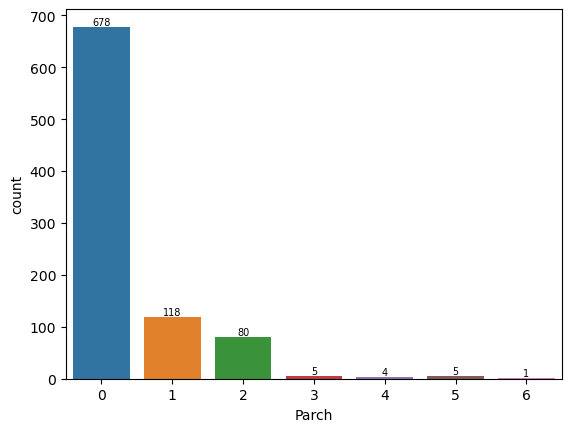

In [23]:
# Parch column

a= sns.countplot(x = df['Parch'])
a.bar_label(a.containers[0], fontsize=7);

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64
--------------------------------------------------


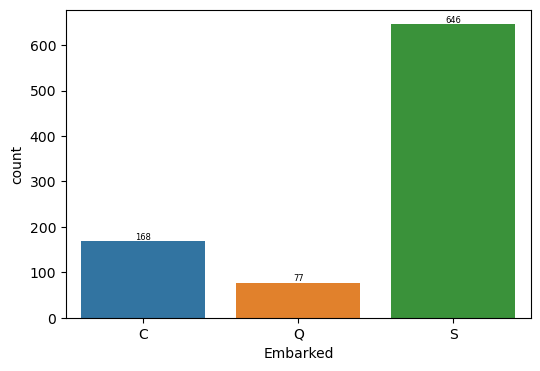

In [24]:
# Embarked column

print((df['Embarked'].value_counts()/891)*100)
print("-"*50)
plt.figure(figsize = (6,4))
a= sns.countplot(x = df['Embarked'] )
a.bar_label(a.containers[0], fontsize=6);

0.45956263424701577
0.9865867453652877


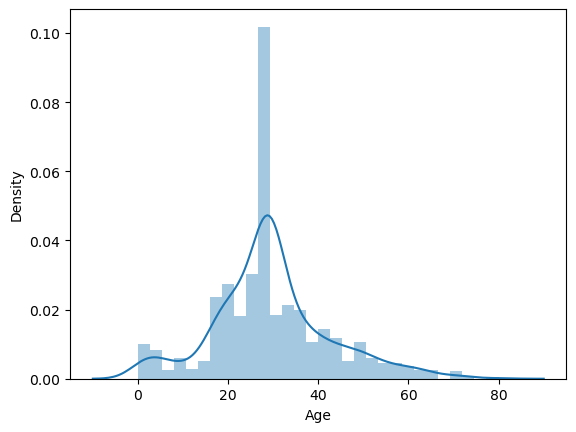

In [25]:
# Age column

sns.distplot(df['Age'])

print(df['Age'].skew())
print(df['Age'].kurt())

<Axes: xlabel='Age'>

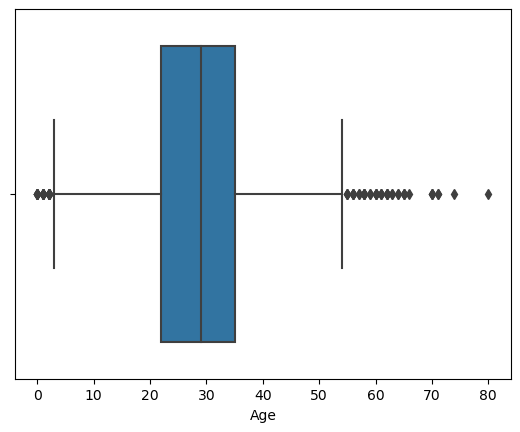

In [26]:
sns.boxplot(x = df['Age'])

In [27]:
print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1


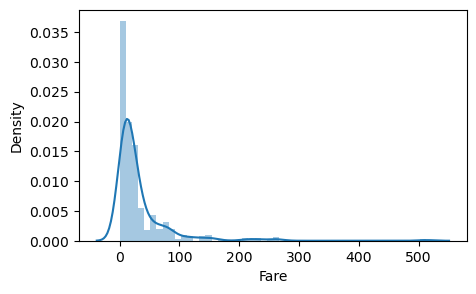

In [77]:
# Fare column
plt.figure(figsize = (5,3))
sns.distplot(df['Fare'] , kde = True);

#### Observation
- Highly skewed data, a lot of people had cheaper tickets

People with fare in between $200 and $300 17
People with fare in greater than $300 3


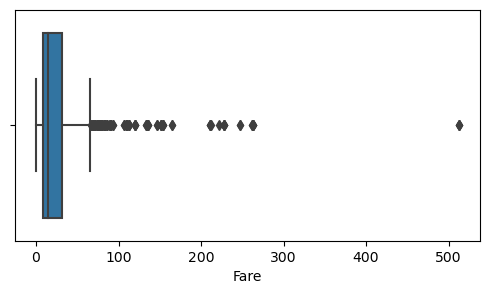

In [78]:
plt.figure(figsize= (6,3))
sns.boxplot(x = df['Fare'])
print("People with fare in between $200 and $300",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare in greater than $300",df[df['Fare']>300].shape[0])

#### Observations:
- Outliers are there in the data

### Multivariate Analysis

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


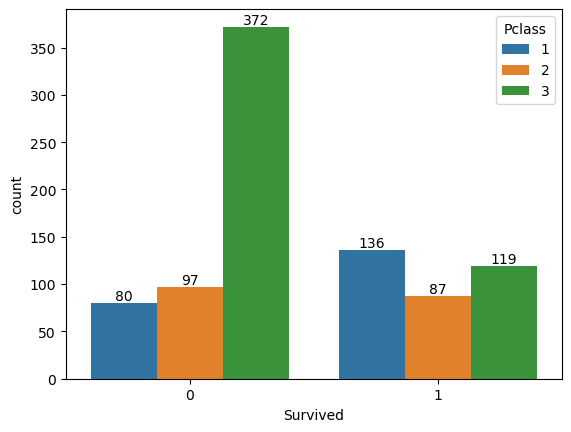

In [107]:
# Survival with Pclass
a = sns.countplot(x = df['Survived'], hue=df['Pclass'])
a.bar_label(a.containers[0]) , a.bar_label(a.containers[1]) , a.bar_label(a.containers[2])
pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

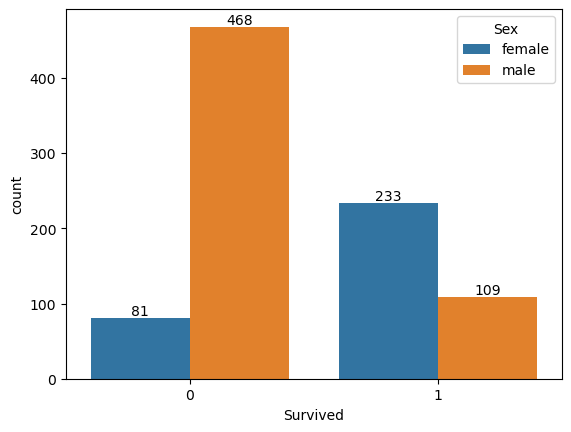

In [110]:
# Survival with Sex
a = sns.countplot(x = df['Survived'], hue=df['Sex'])
a.bar_label(a.containers[0]) , a.bar_label(a.containers[1]);

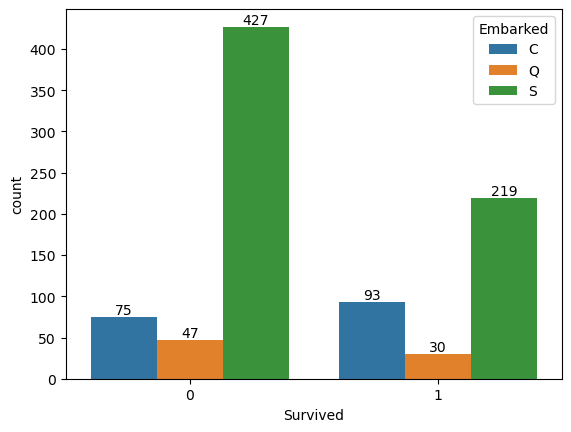

In [112]:
# Survival with Embarked
a = sns.countplot(x = df['Survived'], hue=df['Embarked'])
a.bar_label(a.containers[0]) , a.bar_label(a.containers[1]) , a.bar_label(a.containers[2]);

<Axes: xlabel='Age', ylabel='Density'>

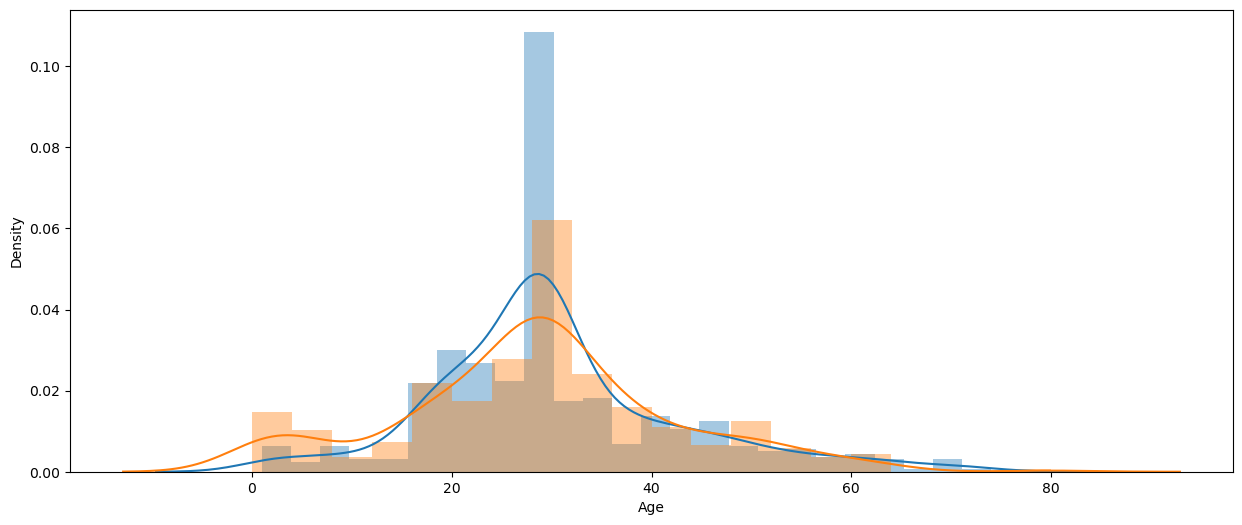

In [114]:
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

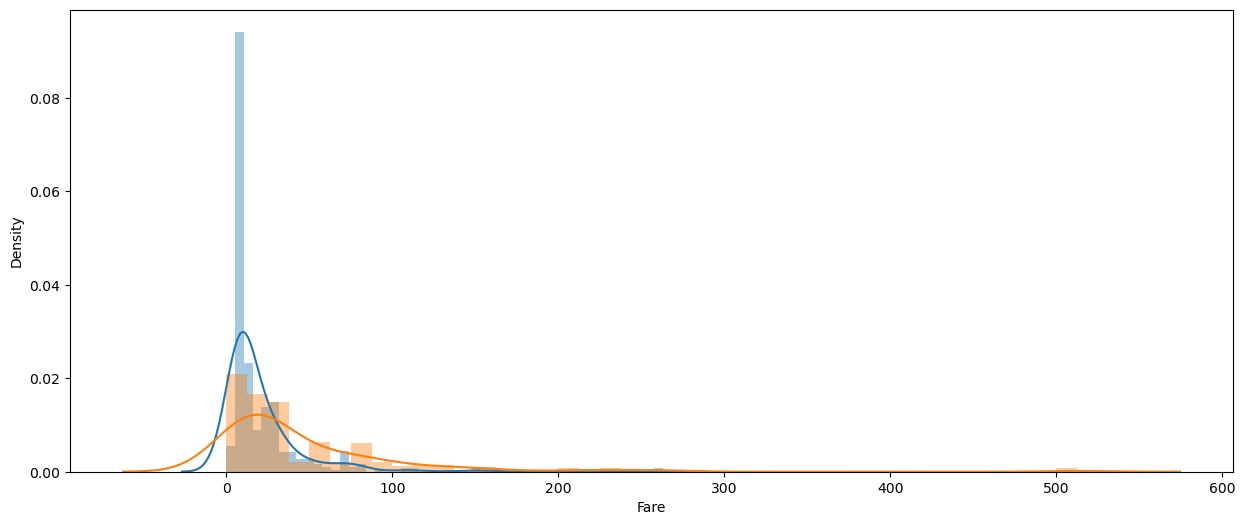

In [115]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

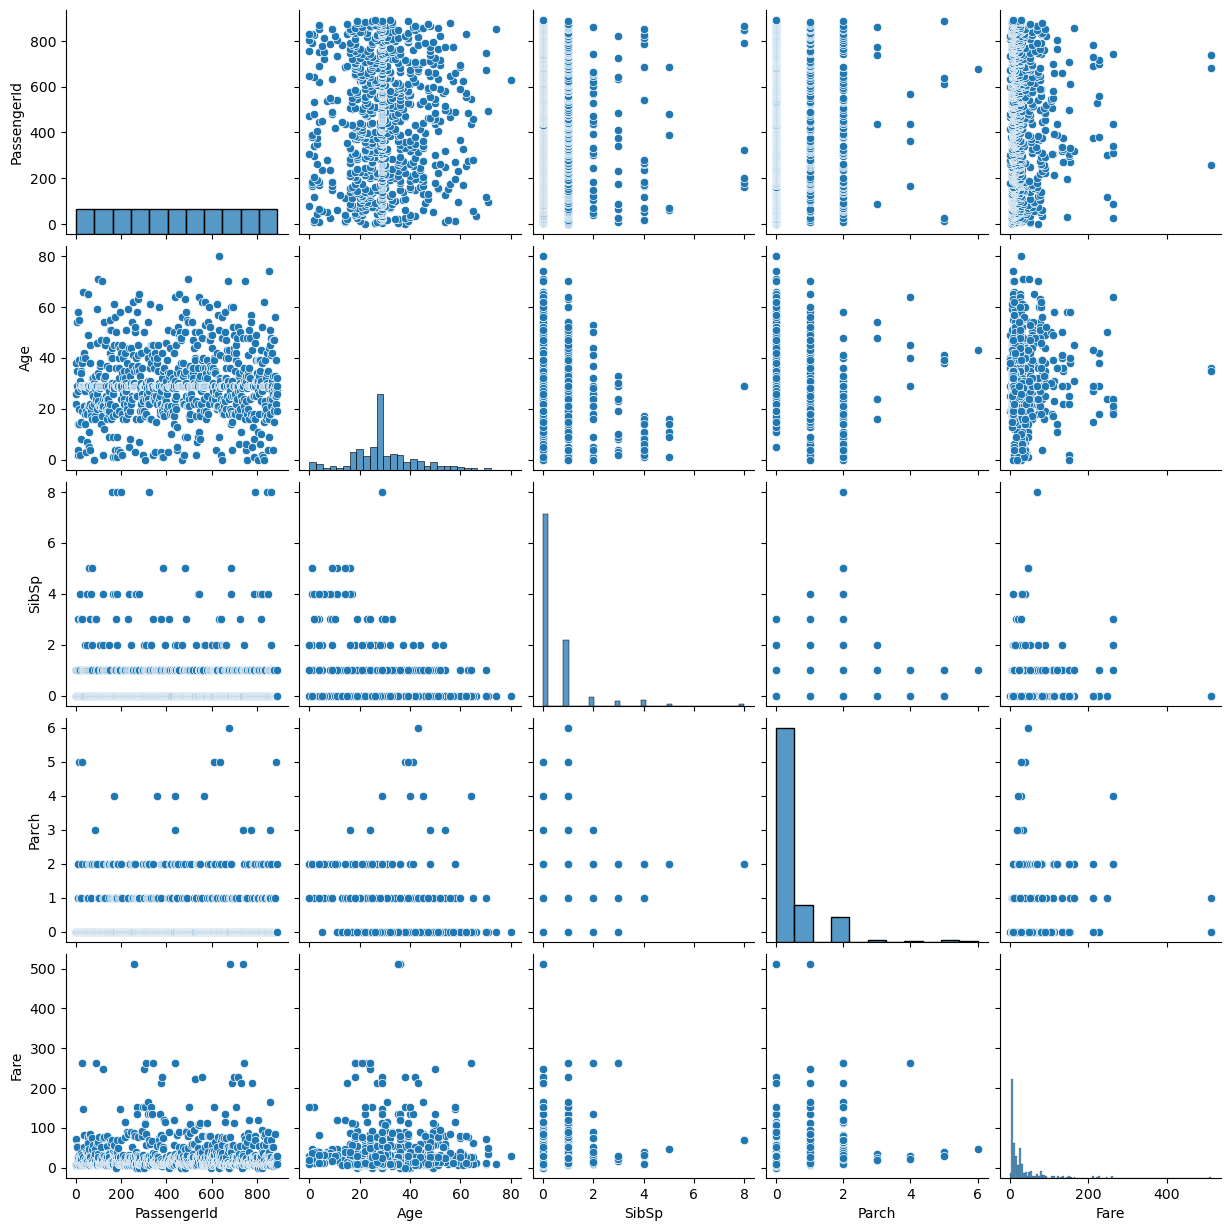

In [117]:
sns.pairplot(df)

<Axes: >

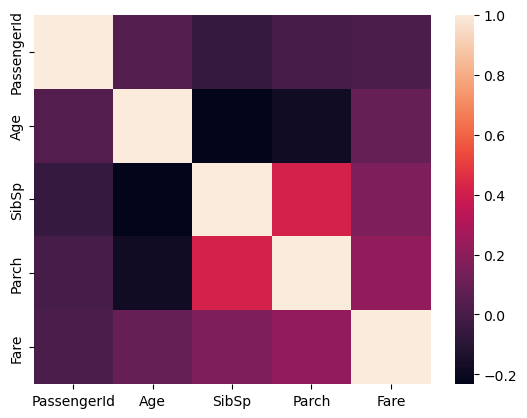

In [118]:
# Heatmap
sns.heatmap(df.corr())